# Load Libraries

In [107]:
import pandas as pd
import numpy as np
import csv
import re


In [108]:
csv_path = '/Users/amulya/Desktop/Elsewhere/me/Work/Hackathons/Numhack/Temperature-and-Coral-Bleaching/Data/coral.csv'


# Initial Analysis

In [109]:
# Read the CSV file
try:
    df = pd.read_csv(
        csv_path,
        na_values=['nd'],       # Replace 'nd' with NaN
        keep_default_na=True,   # Keep default NaN values
        quotechar='"',          # Character used to denote the start and end of a quoted item
        escapechar='\\',        # Character used to escape the quotechar inside a quoted item
        encoding='utf-8',       # Ensure proper encoding
        engine='python',        # Use the Python engine for better flexibility with malformed files
        on_bad_lines='warn'     # Warn about bad lines
    )
    print("CSV file loaded successfully.")
except Exception as e:
    print(f"Error loading CSV file: {e}")

CSV file loaded successfully.


In [110]:
print("Initial DataFrame:")
df.head()

Initial DataFrame:


,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.16,-82.53,Atlantic,NaN,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5.00,0.00,0.00,0.74,7.25,0.18,2005-09-15,NaN,NaN,NaN
1,3467,10324754,Donner,-17.57,-149.78,Pacific,NaN,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4.00,0.00,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,NaN
2,1794,10323866,Donner,18.37,-64.56,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7.00,0.00,0.00,1.04,11.66,0.26,2006-01-15,NaN,NaN,NaN
3,8647,10328028,Donner,17.76,-64.57,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4.00,0.00,0.00,0.75,5.64,0.20,2006-04-15,NaN,NaN,NaN
4,8648,10328029,Donner,17.77,-64.58,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5.00,0.00,0.00,0.92,6.89,0.25,2006-04-15,NaN,NaN,NaN


In [111]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                28821 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41358 non-null  object 
 9   Country_Name                           41360 non-null  object 
 10  State_Island_Province_Name             41262 non-null

In [112]:
print("\nMissing Values in Each Column:")
df.isna().sum()


Missing Values in Each Column:


Site_ID                   0
Sample_ID                 0
Data_Source               0
Latitude_Degrees          0
Longitude_Degrees         0
                      ...  
TSA_DHWMean             132
Date                      0
Site_Comments         39104
Sample_Comments       38403
Bleaching_Comments    38692
Length: 62, dtype: int64

In [113]:
# summary table function
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [114]:
summary(df).style.background_gradient(cmap='YlOrBr')

data shape: (41361, 62)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
Site_ID,int64,0,0.000000,12702,1.000000,1000060.000000,74558.164793,252041.802612,2501,3467,1794
Sample_ID,int64,0,0.000000,27005,9623.000000,10331713.000000,10128797.707817,1373151.378025,10324336,10324754,10323866
Data_Source,object,0,0.000000,9,nan,nan,nan,nan,Donner,Donner,Donner
Latitude_Degrees,float64,0,0.000000,11066,-30.262500,36.750000,7.558085,15.732185,23.163000,-17.575000,18.369000
Longitude_Degrees,float64,0,0.000000,11025,-179.974300,179.964500,34.966127,103.404598,-82.526000,-149.783300,-64.564000
Ocean_Name,object,0,0.000000,5,nan,nan,nan,nan,Atlantic,Pacific,Atlantic
Reef_ID,object,12540,30.318416,5354,nan,nan,nan,nan,nan,nan,nan
Realm_Name,object,0,0.000000,9,nan,nan,nan,nan,Tropical Atlantic,Eastern Indo-Pacific,Tropical Atlantic
Ecoregion_Name,object,3,0.007253,114,nan,nan,nan,nan,Cuba and Cayman Islands,Society Islands French Polynesia,Hispaniola Puerto Rico and Lesser Antilles
Country_Name,object,1,0.002418,90,nan,nan,nan,nan,Cuba,French Polynesia,United Kingdom


# Processing

### Dropping unimportant columns

Put why for each

Reef_id, Substrate_Name, Site_Id, Sample_Id, Data_Source, Site_Comments, Sample_Comments, Bleaching_Comments

In [116]:
df.drop(['Reef_ID', 'Substrate_Name', 'Site_ID', 'Sample_ID', 'Data_Source', 'Site_Comments', 'Sample_Comments', 'Bleaching_Comments'], 
                axis = 1, inplace = True)

In [117]:
df

,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Country_Name,State_Island_Province_Name,City_Town_Name,Site_Name,Distance_to_Shore,...,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date
0,23.16,-82.53,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,Cuba,Havana,Havana,Puntilla,"8,519.23",...,-2.17,0.00,1.09,5.00,0.00,0.00,0.74,7.25,0.18,2005-09-15
1,-17.57,-149.78,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,Society Islands,Moorea,NaN,"1,431.62",...,-1.26,0.25,0.93,4.00,0.00,0.26,0.67,4.65,0.19,1991-03-15
2,18.37,-64.56,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,British Virgin Islands,Peter Island,Coral Gardens,182.33,...,-1.49,7.00,1.31,7.00,0.00,0.00,1.04,11.66,0.26,2006-01-15
3,17.76,-64.57,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3219,313.13,...,-1.49,3.00,0.94,4.00,0.00,0.00,0.75,5.64,0.20,2006-04-15
4,17.77,-64.58,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,US Virgin Islands,St. Croix,3194,792.00,...,-1.50,3.00,1.33,5.00,0.00,0.00,0.92,6.89,0.25,2006-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41356,-8.37,116.08,Pacific,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,West Nusa Tenggara,North Lombok Regency,Statue Garden - South of Gili Air,91.31,...,-0.95,1.00,2.00,8.00,1.00,2.09,1.49,9.00,0.63,2019-05-28
41357,-8.35,116.05,Pacific,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,West Nusa Tenggara,North Lombok Regency,Meno Slope,129.08,...,-1.00,1.00,1.75,8.00,1.00,2.00,1.29,8.01,0.65,2019-05-16
41358,-8.35,116.05,Pacific,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,West Nusa Tenggara,North Lombok Regency,Meno Slope,129.08,...,-1.00,1.00,1.75,8.00,1.00,2.00,1.29,8.01,0.65,2019-05-16
41359,-8.34,116.06,Pacific,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,West Nusa Tenggara,North Lombok Regency,Turtle City,209.17,...,-1.00,1.00,1.75,8.00,1.00,2.00,1.29,8.01,0.65,2019-05-29


In [118]:
df.to_csv('imp_cols.csv', encoding='utf-8', index=False)

In [119]:
summary(df).style.background_gradient(cmap='YlOrBr')

data shape: (41361, 54)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
Latitude_Degrees,float64,0,0.000000,11066,-30.262500,36.750000,7.558085,15.732185,23.163000,-17.575000,18.369000
Longitude_Degrees,float64,0,0.000000,11025,-179.974300,179.964500,34.966127,103.404598,-82.526000,-149.783300,-64.564000
Ocean_Name,object,0,0.000000,5,nan,nan,nan,nan,Atlantic,Pacific,Atlantic
Realm_Name,object,0,0.000000,9,nan,nan,nan,nan,Tropical Atlantic,Eastern Indo-Pacific,Tropical Atlantic
Ecoregion_Name,object,3,0.007253,114,nan,nan,nan,nan,Cuba and Cayman Islands,Society Islands French Polynesia,Hispaniola Puerto Rico and Lesser Antilles
Country_Name,object,1,0.002418,90,nan,nan,nan,nan,Cuba,French Polynesia,United Kingdom
State_Island_Province_Name,object,99,0.239356,480,nan,nan,nan,nan,Havana,Society Islands,British Virgin Islands
City_Town_Name,object,1133,2.739295,1897,nan,nan,nan,nan,Havana,Moorea,Peter Island
Site_Name,object,34429,83.240250,2237,nan,nan,nan,nan,Puntilla,nan,Coral Gardens
Distance_to_Shore,float64,2,0.004835,12081,3.200000,299218.500000,3761.764707,13550.414805,8519.230000,1431.620000,182.330000


### Drop Columns with >50% missingness

Decision Rules:

Drop Columns with >50% Missingness:
Site_Name (83.24% missing)

Drop Columns with 45.53% Missingness:
Bleaching_Level (45.53% missing)

Impute Columns with 30.11% Missingness:
Percent_Cover (30.11% missing)

Impute Columns with 23.94% Missingness:
State_Island_Province_Name (23.94% missing)

Impute Columns with 2.74% Missingness:
City_Town_Name (2.74% missing)

In [142]:
# Columns to drop due to high missingness

columns_to_drop = ['Site_Name', 'Bleaching_Level']

df = df.drop(columns=columns_to_drop, errors='ignore')

print(f"\nDropped columns: {columns_to_drop}")


Dropped columns: ['Site_Name', 'Bleaching_Level']


# Convert Data Types

In [186]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41066 entries, 0 to 41360
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude_Degrees                       41066 non-null  float64
 1   Longitude_Degrees                      41066 non-null  float64
 2   Ocean_Name                             41066 non-null  object 
 3   Realm_Name                             41066 non-null  object 
 4   Ecoregion_Name                         41066 non-null  object 
 5   Country_Name                           41066 non-null  object 
 6   State_Island_Province_Name             41066 non-null  object 
 7   City_Town_Name                         40036 non-null  object 
 8   Distance_to_Shore                      41066 non-null  float64
 9   Exposure                               41066 non-null  object 
 10  Turbidity                              41066 non-null  float64
 11  Cyclone

# Deal with missing values 

## For Percent Cover


Info about the column

Data Type: float64
Missing Values: 12,455 (30.11%)
Unique Values: 359
Range: 0 to 100
Average: ~19.42
Standard Deviation: ~20.85
Characteristics:

Continuous Variable: Represents the percentage coverage, likely bounded between 0 and 100.
High Variability: With a high standard deviation, the data is spread out, indicating diverse coverage percentages across observations.
Moderate Cardinality: 359 unique values suggest that while the data is continuous, there might be a clustering of certain values.

In [143]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,41351,41352,41353,41354,41355,41356,41357,41358,41359,41360
Latitude_Degrees,23.16,-17.57,18.37,17.76,17.77,9.82,17.81,-3.99,25.43,-19.20,...,-6.16,-6.15,-3.26,-3.26,-8.37,-8.37,-8.35,-8.35,-8.34,-8.34
Longitude_Degrees,-82.53,-149.78,-64.56,-64.57,-64.58,-75.89,-64.63,39.75,-80.16,146.81,...,39.12,39.13,40.15,40.15,116.08,116.08,116.05,116.05,116.06,116.06
Ocean_Name,Atlantic,Pacific,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Indian,Atlantic,Pacific,...,Indian,Indian,Indian,Indian,Pacific,Pacific,Pacific,Pacific,Pacific,Pacific
Realm_Name,Tropical Atlantic,Eastern Indo-Pacific,Tropical Atlantic,Tropical Atlantic,Tropical Atlantic,Tropical Atlantic,Tropical Atlantic,Western Indo-Pacific,Tropical Atlantic,Central Indo-Pacific,...,Western Indo-Pacific,Western Indo-Pacific,Western Indo-Pacific,Western Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific,Central Indo-Pacific
Ecoregion_Name,Cuba and Cayman Islands,Society Islands French Polynesia,Hispaniola Puerto Rico and Lesser Antilles,Hispaniola Puerto Rico and Lesser Antilles,Hispaniola Puerto Rico and Lesser Antilles,Netherlands Antilles and south Caribbean,Hispaniola Puerto Rico and Lesser Antilles,Kenya and Tanzania coast,Bahamas and Florida Keys,Central and northern Great Barrier Reef,...,Kenya and Tanzania coast,Kenya and Tanzania coast,Kenya and Tanzania coast,Kenya and Tanzania coast,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea,Lesser Sunda Islands and Savu Sea
Country_Name,Cuba,French Polynesia,United Kingdom,United States,United States,Colombia,United States,Kenya,United States,Australia,...,Tanzania,Tanzania,Kenya,Kenya,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
State_Island_Province_Name,Havana,Society Islands,British Virgin Islands,US Virgin Islands,US Virgin Islands,Sucre,US Virgin Islands,Mombasa County,Florida,Queensland,...,Zanzibar Archipelago,Zanzibar Archipelago,Kilifi County,Kilifi County,West Nusa Tenggara,West Nusa Tenggara,West Nusa Tenggara,West Nusa Tenggara,West Nusa Tenggara,West Nusa Tenggara
City_Town_Name,Havana,Moorea,Peter Island,St. Croix,St. Croix,San Bernardo Islands,St. Croix,Mombasa Marine Park,Miami-Dade County,Middle Reef,...,Zanzibar Urban/West Region,Zanzibar Urban/West Region,Malindi Marine National Park,Malindi Marine National Park,North Lombok Regency,North Lombok Regency,North Lombok Regency,North Lombok Regency,North Lombok Regency,North Lombok Regency
Distance_to_Shore,"8,519.23","1,431.62",182.33,313.13,792.00,"4,569.60","2,399.36","1,004.93","3,920.39","2,750.37",...,683.35,132.80,"1,982.59","1,982.59",91.31,91.31,129.08,129.08,209.17,209.17
Exposure,Exposed,Exposed,Exposed,Exposed,Exposed,Sometimes,Exposed,Sheltered,Sometimes,Sheltered,...,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered,Sheltered


#### Visualizations to understand the missing data

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [123]:
df['Percent_Cover_Missing'] = df['Percent_Cover'].isna()

/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_39271/1526893107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Percent_Cover_Missing', data=df, palette=['#d73027', '#1a9850'])


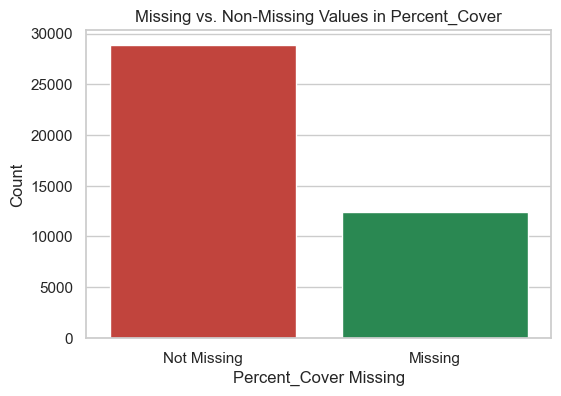

In [124]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Percent_Cover_Missing', data=df, palette=['#d73027', '#1a9850'])

# Customize the plot
plt.title('Missing vs. Non-Missing Values in Percent_Cover')
plt.xlabel('Percent_Cover Missing')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Missing', 'Missing'])

# Display the plot
plt.show()


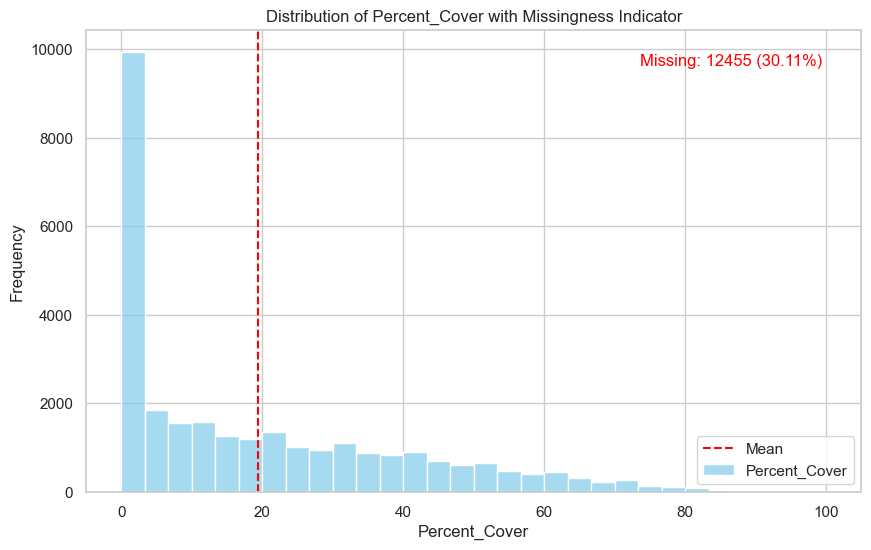

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Percent_Cover'], bins=30, kde=False, color='skyblue', label='Percent_Cover')

# Highlight missing values
missing_count = df['Percent_Cover'].isna().sum()
total = len(df)
plt.axvline(x=df['Percent_Cover'].mean(), color='red', linestyle='--', label='Mean')

# Annotate the number of missing values
plt.text(0.95, 0.95, f'Missing: {missing_count} ({missing_count/total*100:.2f}%)',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         fontsize=12,
         color='red')

# Customize the plot
plt.title('Distribution of Percent_Cover with Missingness Indicator')
plt.xlabel('Percent_Cover')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()


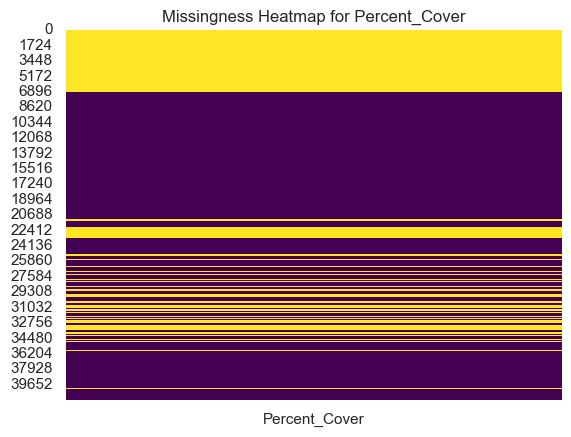

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df[['Percent_Cover']].isna(), cbar=False, cmap='viridis')
plt.title('Missingness Heatmap for Percent_Cover')
plt.show()


Missing Completely at Random (MCAR): The missingness is unrelated to any data, observed or unobserved.

Missing at Random (MAR): The missingness is related to observed data but not the missing data itself.

Missing Not at Random (MNAR): The missingness is related to the missing data itself.

In [131]:
import pandas as pd
import numpy as np

#Create missingness indicator
df['Percent_Cover_missing'] = df['Percent_Cover'].isna().astype(int)

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric Columns for Correlation:", numeric_cols)

# Compute correlation
correlation = df[numeric_cols].corr()['Percent_Cover_missing'].sort_values(ascending=False)
print("\nCorrelation with Percent_Cover_missing:")
print(correlation)


Numeric Columns for Correlation: ['Latitude_Degrees', 'Longitude_Degrees', 'Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year', 'Depth_m', 'Percent_Cover', 'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA', 'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Percent_Cover_missing']

Correlation with Percent_Cover_missing:
Percent_Cover_missing                    1.00
Percent_Bleaching         

/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_39271/1691916602.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')


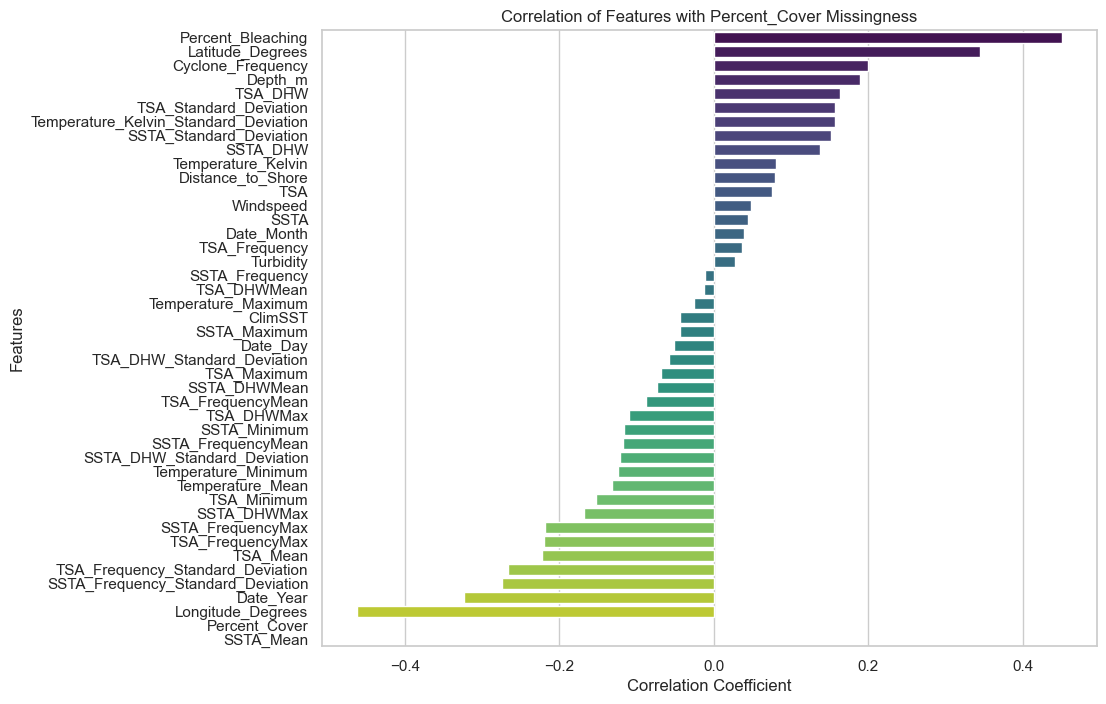

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the 'Percent_Cover_missing' correlation with itself
correlation = correlation.drop('Percent_Cover_missing')

# Plot the correlation
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('Correlation of Features with Percent_Cover Missingness')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


#### Understanding if the data is MCAR, MAR, MNAR

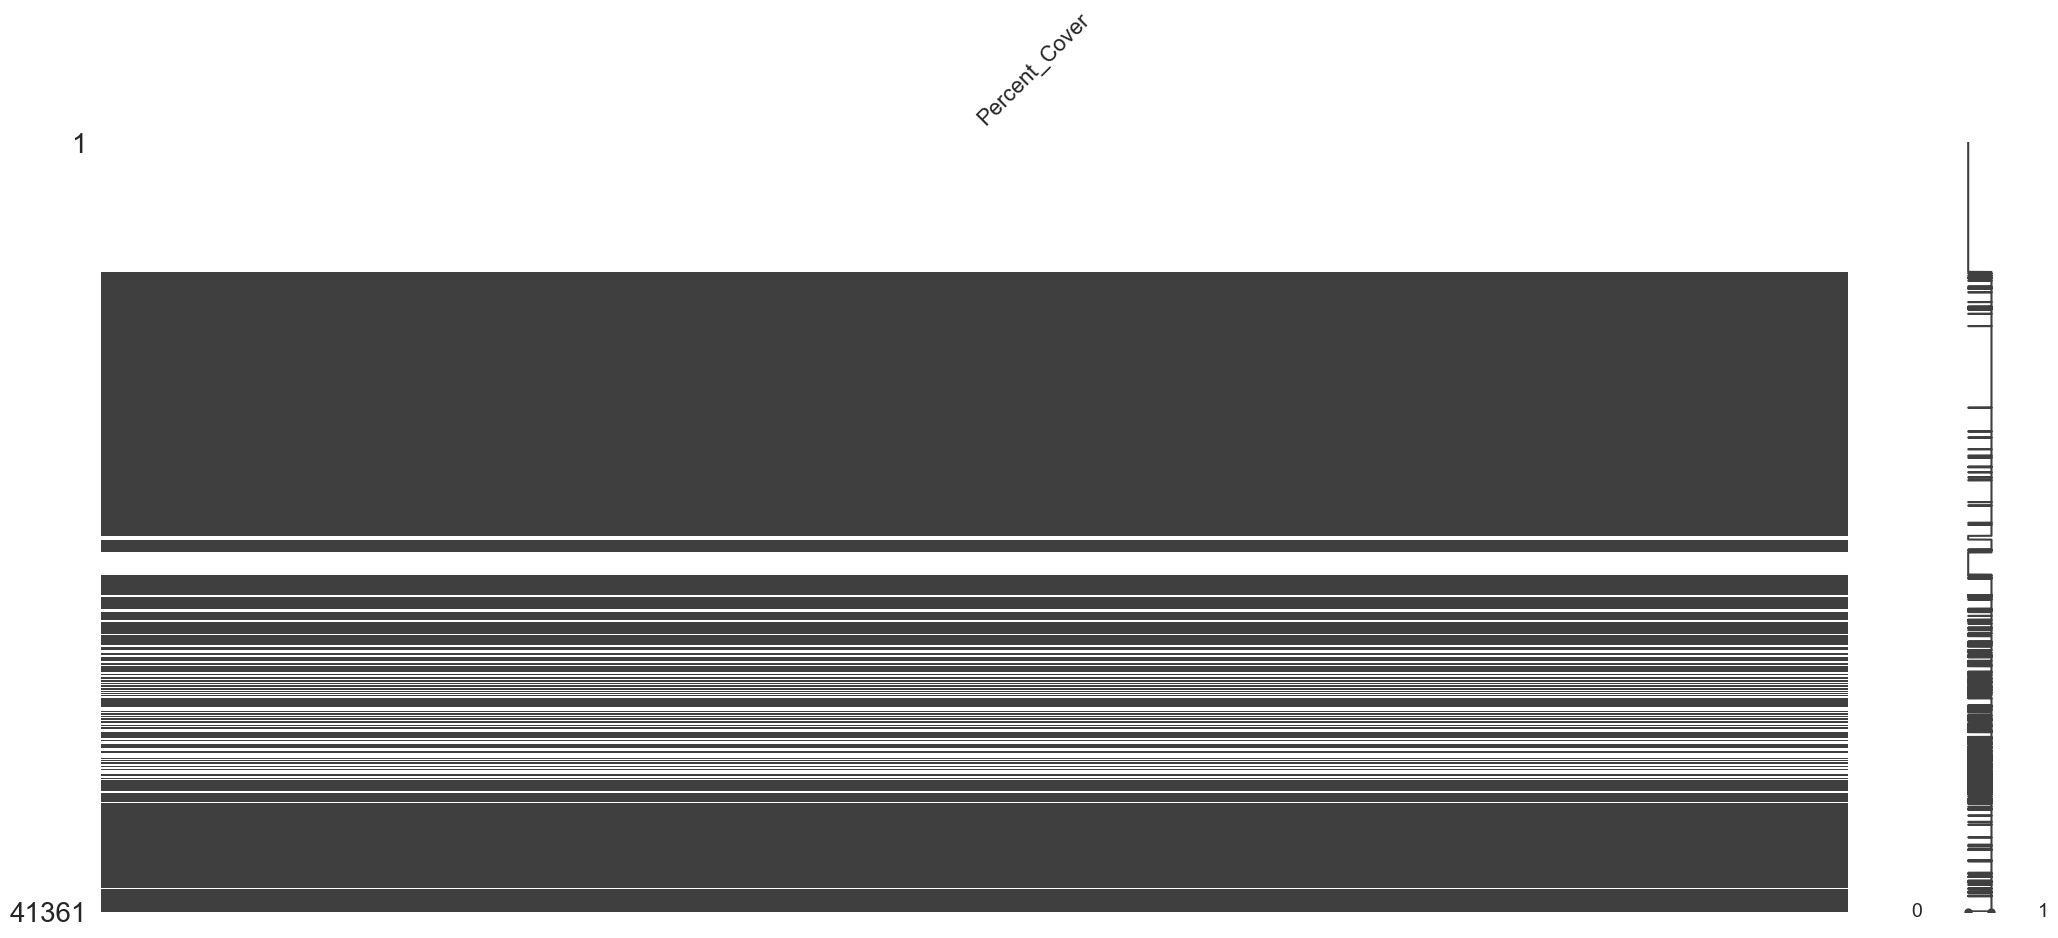

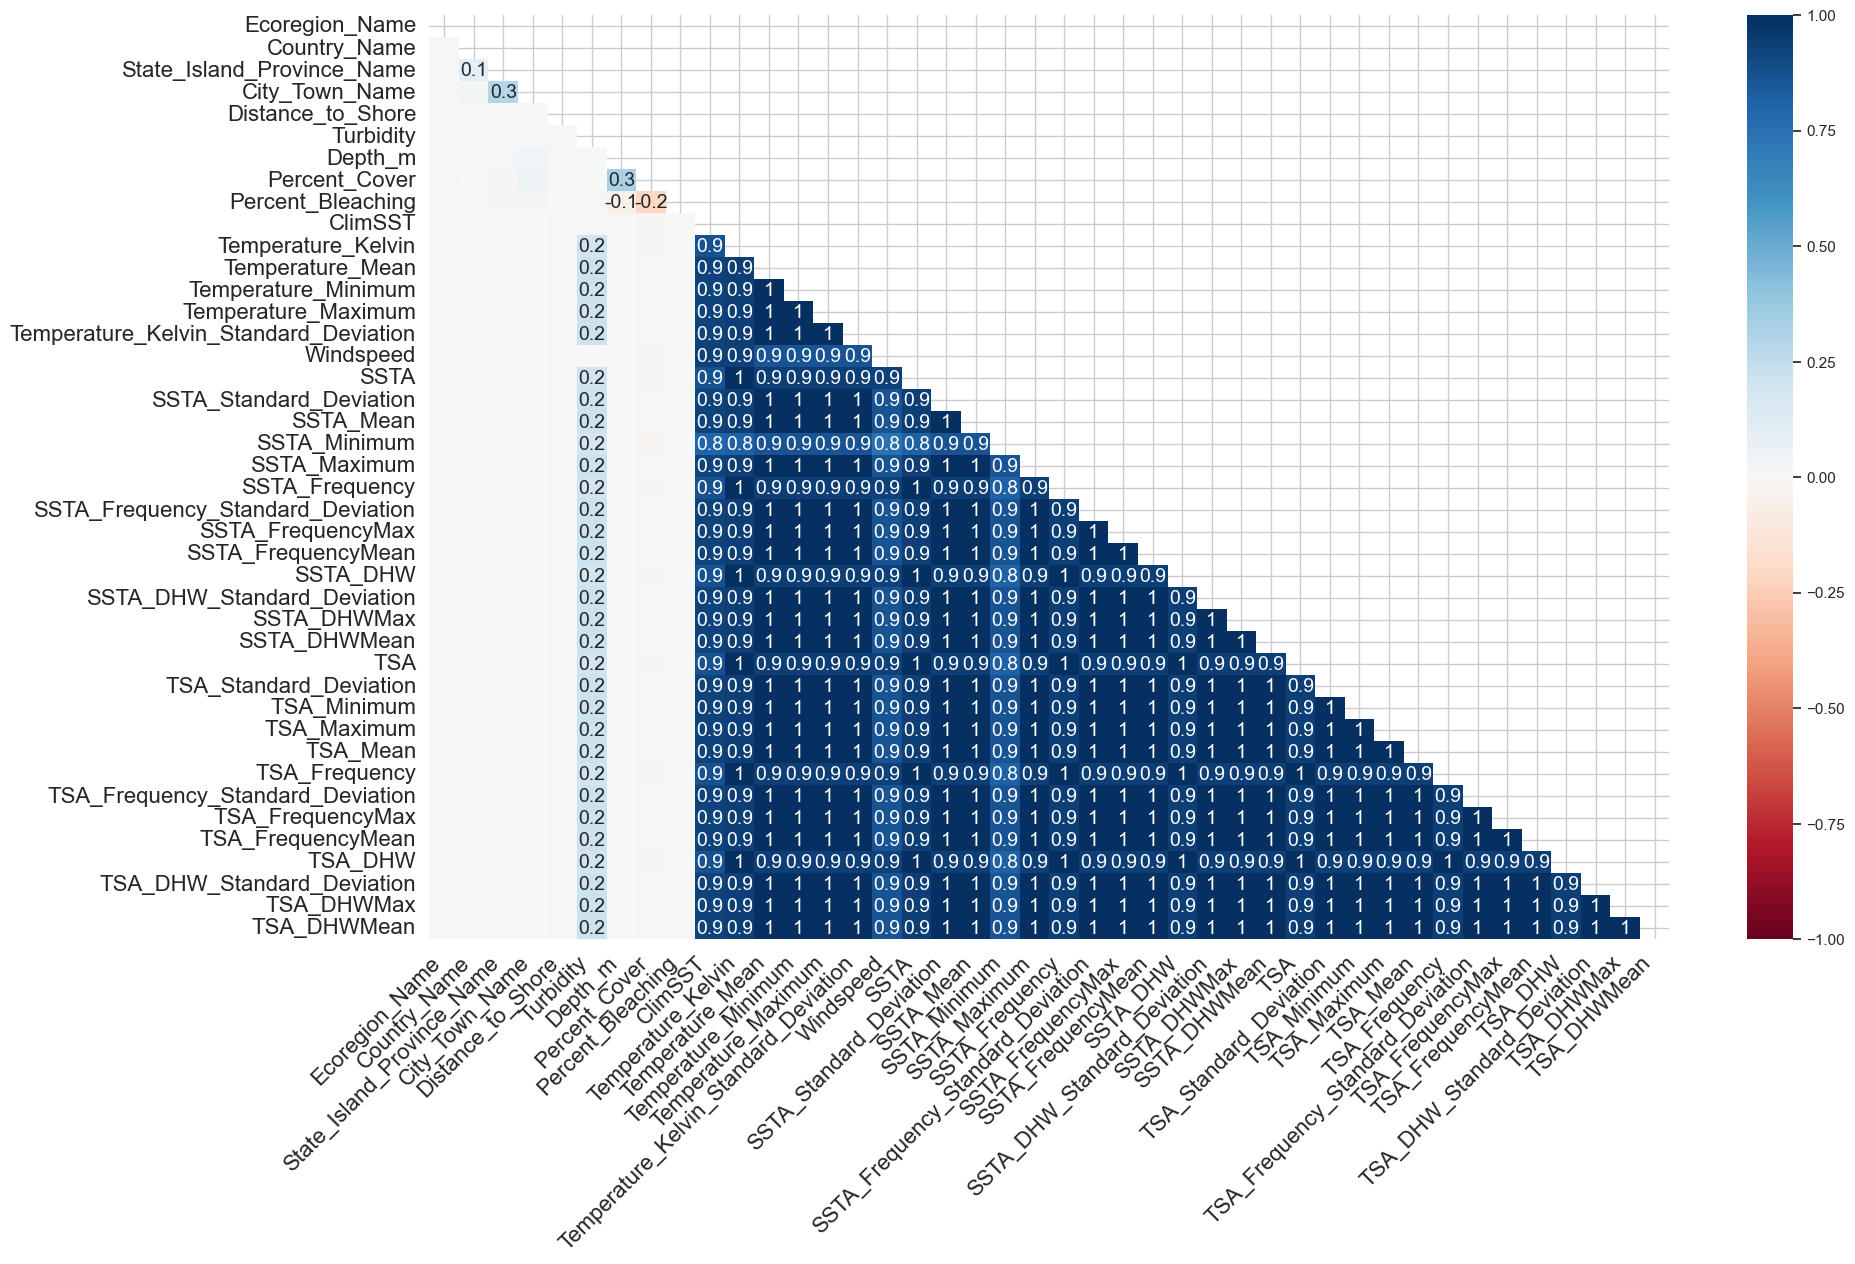

In [134]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missingness matrix
msno.matrix(df[['Percent_Cover']])
plt.show()

# Visualize missingness heatmap with other variables
msno.heatmap(df)
plt.show()


In [138]:
from scipy import stats

# Create a boolean indicator for missing Percent_Cover
df['Percent_Cover_missing'] = df['Percent_Cover'].isna()

# Select numeric features to compare
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features.remove('Percent_Cover')  # Remove the target column if present

# Iterate through numeric features and perform t-tests
for feature in numeric_features:
    group_missing = df[df['Percent_Cover_missing']][feature].dropna()
    group_not_missing = df[~df['Percent_Cover_missing']][feature].dropna()
    
    # Perform t-test
    t_stat, p_val = stats.ttest_ind(group_missing, group_not_missing, equal_var=False)
    
    print(f"T-test for {feature}: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")


T-test for Latitude_Degrees: t-statistic = 77.910, p-value = 0.000
T-test for Longitude_Degrees: t-statistic = -109.842, p-value = 0.000
T-test for Distance_to_Shore: t-statistic = 13.767, p-value = 0.000
T-test for Turbidity: t-statistic = 6.237, p-value = 0.000
T-test for Cyclone_Frequency: t-statistic = 36.727, p-value = 0.000
T-test for Date_Day: t-statistic = -12.145, p-value = 0.000
T-test for Date_Month: t-statistic = 8.181, p-value = 0.000
T-test for Date_Year: t-statistic = -74.565, p-value = 0.000
T-test for Depth_m: t-statistic = 31.030, p-value = 0.000
T-test for Percent_Bleaching: t-statistic = 74.377, p-value = 0.000
T-test for ClimSST: t-statistic = -8.603, p-value = 0.000
T-test for Temperature_Kelvin: t-statistic = 17.032, p-value = 0.000
T-test for Temperature_Mean: t-statistic = -29.936, p-value = 0.000
T-test for Temperature_Minimum: t-statistic = -26.740, p-value = 0.000
T-test for Temperature_Maximum: t-statistic = -5.681, p-value = 0.000
T-test for Temperature_Ke

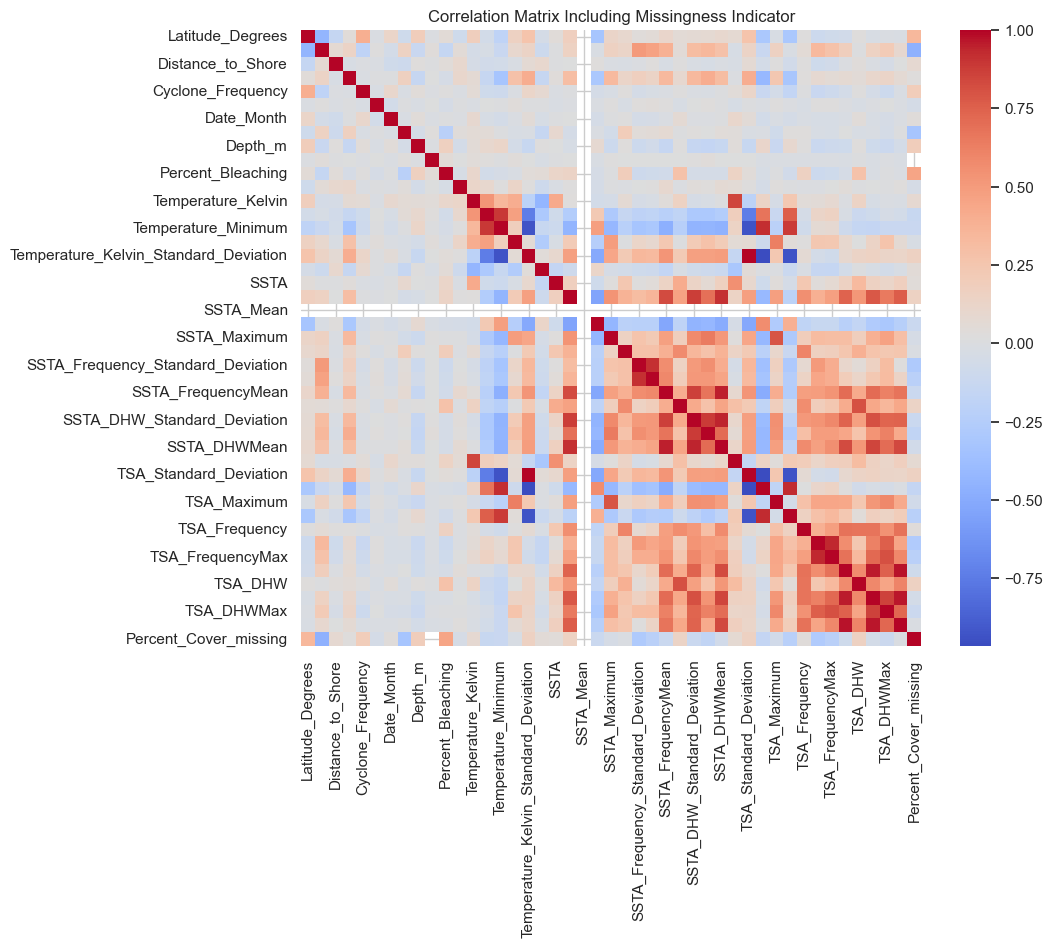

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlation between missingness and other numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm')
plt.title('Correlation Matrix Including Missingness Indicator')
plt.show()


#### Assuming Missing at Random (MAR) and proceeding with KNN imputation

In [146]:
columns_to_drop = ['Percent_Cover_Missing', 'Percent_Cover_missing']

df = df.drop(columns=columns_to_drop, errors='ignore')

print(f"\nDropped columns: {columns_to_drop}")



Dropped columns: ['Percent_Cover_Missing', 'Percent_Cover_missing']


In [147]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer


In [148]:
# Selecting relevant columns for imputation
columns_to_impute = ["Percent_Cover", "SSTA", "Temperature_Kelvin", "Cyclone_Frequency", "Depth_m"]


In [149]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)


In [150]:
imputed_values = knn_imputer.fit_transform(df[columns_to_impute])

In [151]:
# Update only the imputed column ('Percent_Cover') back in the DataFrame
df['Percent_Cover'] = imputed_values[:, 0]  # The first column corresponds to 'Percent_Cover'


In [163]:
df.isnull().sum()

Latitude_Degrees                            0
Longitude_Degrees                           0
Ocean_Name                                  0
Realm_Name                                  0
Ecoregion_Name                              3
Country_Name                                1
State_Island_Province_Name                 99
City_Town_Name                           1133
Distance_to_Shore                           2
Exposure                                    0
Turbidity                                   6
Cyclone_Frequency                           0
Date_Day                                    0
Date_Month                                  0
Date_Year                                   0
Depth_m                                  1799
Percent_Cover                               0
Percent_Bleaching                        6846
ClimSST                                   113
Temperature_Kelvin                        148
Temperature_Mean                          132
Temperature_Minimum               

## For Percent Bleaching

In [181]:
df_filtered.isnull().sum()

Latitude_Degrees                            0
Longitude_Degrees                           0
Ocean_Name                                  0
Realm_Name                                  0
Ecoregion_Name                              0
Country_Name                                0
State_Island_Province_Name                  0
City_Town_Name                           1030
Distance_to_Shore                           0
Exposure                                    0
Turbidity                                   0
Cyclone_Frequency                           0
Date_Day                                    0
Date_Month                                  0
Date_Year                                   0
Depth_m                                  1780
Percent_Cover                               0
Percent_Bleaching                        6782
ClimSST                                     0
Temperature_Kelvin                          0
Temperature_Mean                            0
Temperature_Minimum               

In [167]:
df_filtered['Percent_Bleaching']

0       50.20
1       50.70
2       50.90
3       50.90
4       50.90
         ... 
41356     NaN
41357     NaN
41358     NaN
41359     NaN
41360     NaN
Name: Percent_Bleaching, Length: 41066, dtype: float64

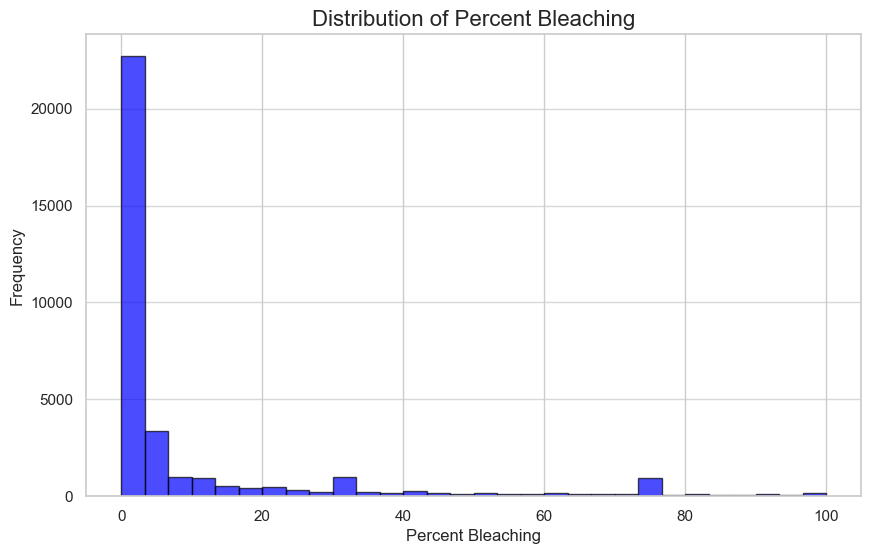

In [168]:
import matplotlib.pyplot as plt

# Plot the Percent_Bleaching column
plt.figure(figsize=(10, 6))
df_filtered['Percent_Bleaching'].dropna().plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Percent Bleaching', fontsize=16)
plt.xlabel('Percent Bleaching', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

Find if the data is MAR, MCAR, MNAR


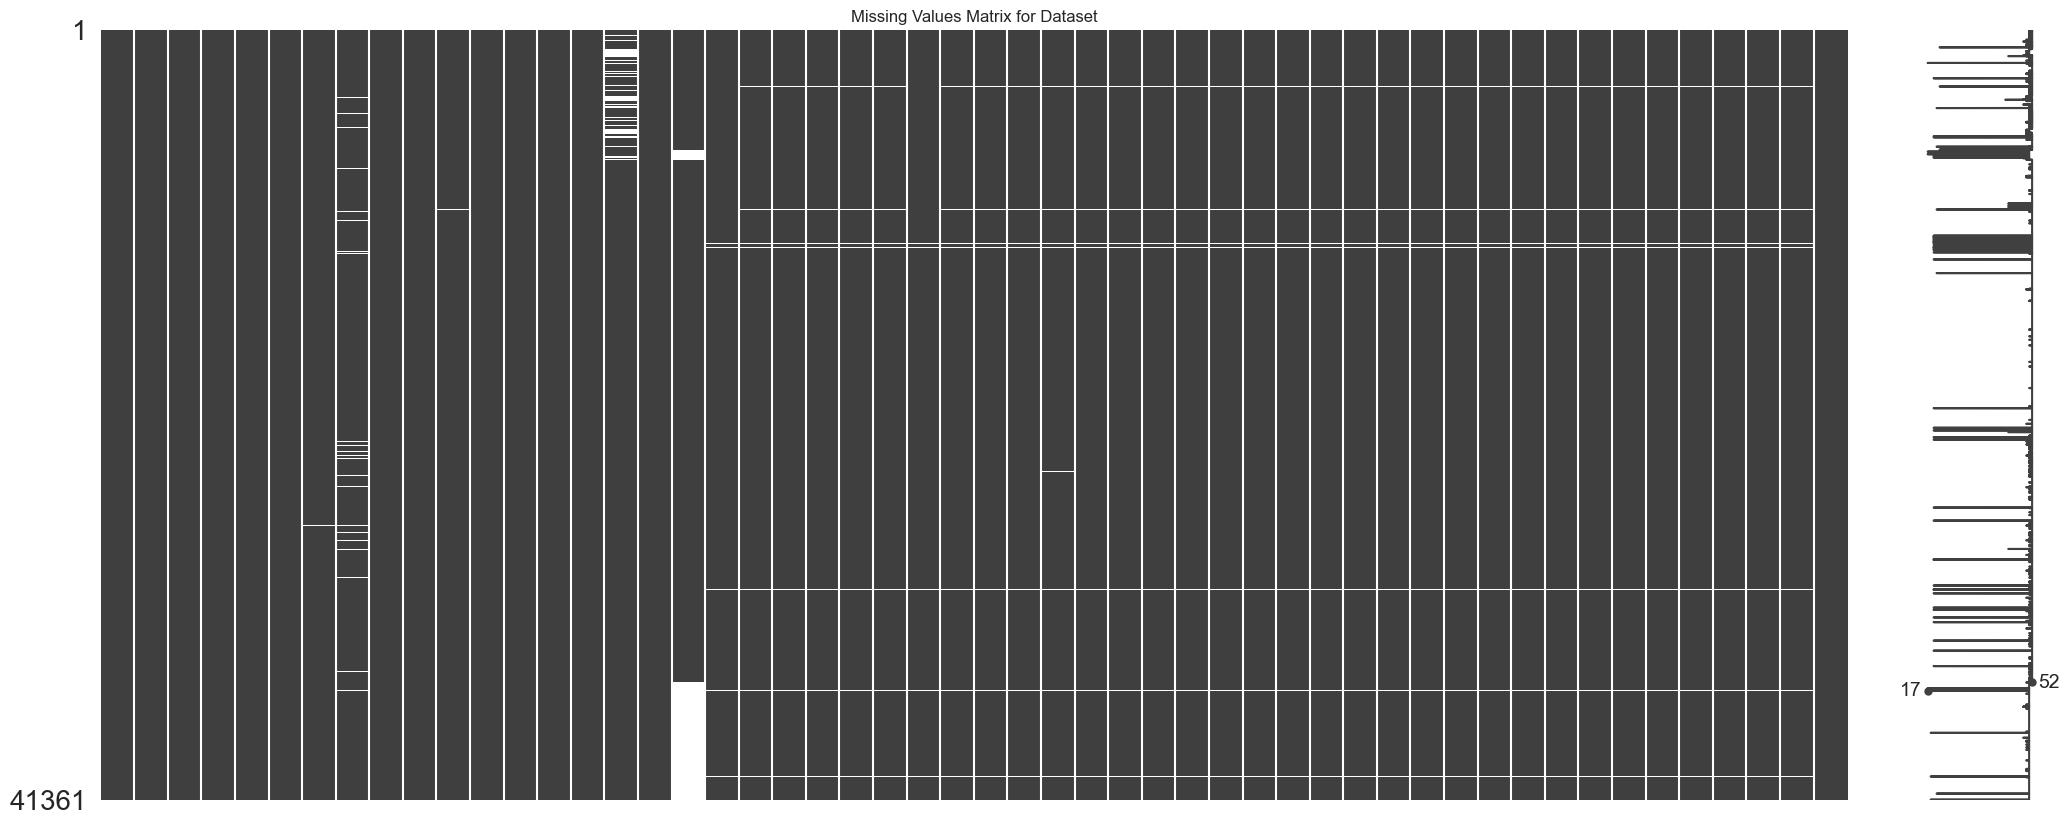

In [183]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values
msno.matrix(df)
plt.title("Missing Values Matrix for Dataset")
plt.show()

In [185]:
import statsmodels.api as sm

# Encode categorical variables if necessary
# X = df[['SSTA', 'Temperature_Kelvin', 'Cyclone_Frequency', 'Depth_m']]
X = df.drop(['Percent_Bleaching', 'Percent_Bleaching_missing'], axis=1)
y = df['Percent_Bleaching_missing']

# Add constant for logistic regression
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary
print(result.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Deal with the other missing values

Dropping rows in Columns with values less than 200 as it accounts for less than 0.5 percent of the data

In [165]:
# Identify columns with less than 200 null values
columns_to_consider = df.columns[df.isna().sum() < 200].tolist()

# Drop rows where any of these columns have missing values
df_filtered = df.dropna(subset=columns_to_consider)


In [166]:
df_filtered.isnull().sum()

Latitude_Degrees                            0
Longitude_Degrees                           0
Ocean_Name                                  0
Realm_Name                                  0
Ecoregion_Name                              0
Country_Name                                0
State_Island_Province_Name                  0
City_Town_Name                           1030
Distance_to_Shore                           0
Exposure                                    0
Turbidity                                   0
Cyclone_Frequency                           0
Date_Day                                    0
Date_Month                                  0
Date_Year                                   0
Depth_m                                  1780
Percent_Cover                               0
Percent_Bleaching                        6782
ClimSST                                     0
Temperature_Kelvin                          0
Temperature_Mean                            0
Temperature_Minimum               

# Continue